<a href="https://colab.research.google.com/github/Aaesha-Alteneiji/Foundation-Of-Data-Science/blob/main/Minimum_Spanning_Tree_for_Optimizing_Pollution_Monitoring_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Minimum Spanning Tree (MST) for Optimizing Pollution Monitoring Networks**

## **Importing the Required Libraries**

In [1]:
%pip install pygeohash

In [2]:
import pandas as pd
import geopandas as gpd
import pygeohash as gh
import numpy as np

In [41]:
from datascience import *
%matplotlib inline
#path_data = '../../../assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from matplotlib import colors

In [4]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from sklearn.preprocessing import StandardScaler

In [5]:
import time
from scipy.spatial import distance_matrix
from scipy.sparse.csgraph import minimum_spanning_tree
from scipy.spatial.distance import pdist, squareform

## **Configuring Variables & Importing Files**

In [6]:
Geohash_percision = 6

In [7]:
#Create new dataframe table, and import all available Chicago files in the repositry to it.
Chicago_df_original = Table().to_df()

for i in range(1,20):
  file_link = 'https://raw.githubusercontent.com/IsamAljawarneh/datasets/refs/heads/master/data/Chicago/AQ_data/chicago_eclipse_data_part_'+str(i)+'.csv'
  Chicago_df_original = pd.concat([Chicago_df_original, pd.read_csv(file_link,index_col=False)], ignore_index=True)

Chicago_df_original

,City,DeviceId,LocationName,Latitude,Longitude,ReadingDateTimeUTC,PM25,CalibratedPM25,CalibratedO3,CalibratedNO2,CO,Temperature,Humidity,BatteryLevel,PercentBattery,CellSignal
0,Chicago,2002,State & Garfield (SB),41.794921,-87.625857,2021-06-20 00:03:00,5.561094,NaN,NaN,NaN,0.123580,27.383499,55.128479,4.237187,93.964844,-76.0
1,Chicago,2002,State & Garfield (SB),41.794921,-87.625857,2021-06-20 00:08:10,6.633914,NaN,NaN,NaN,0.132103,27.079086,55.059814,4.236094,93.964844,-81.0
2,Chicago,2002,State & Garfield (SB),41.794921,-87.625857,2021-06-20 00:13:20,4.068707,NaN,NaN,NaN,0.131126,27.079086,55.035400,4.236406,93.964844,-80.0
3,Chicago,2002,State & Garfield (SB),41.794921,-87.625857,2021-06-20 00:18:30,6.351702,NaN,NaN,NaN,0.138784,26.945572,54.632568,4.236094,93.863281,-82.0
4,Chicago,2002,State & Garfield (SB),41.794921,-87.625857,2021-06-20 00:23:40,9.574065,NaN,NaN,NaN,0.413070,26.828079,53.907776,4.235938,93.863281,-81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461084,Chicago,2129,Lincoln & California (NWB),41.985920,-87.699628,2021-10-03 23:29:48,4.479115,10.72,34.66,12.51,0.413648,22.817307,73.245239,4.176250,89.785156,-62.0
2461085,Chicago,2129,Lincoln & California (NWB),41.985920,-87.699628,2021-10-03 23:34:58,6.322502,14.89,34.71,6.35,0.656208,22.713165,73.222351,4.186875,89.785156,-61.0
2461086,Chicago,2129,Lincoln & California (NWB),41.985920,-87.699628,2021-10-03 23:40:08,9.796841,13.51,36.71,2.62,0.336273,22.659760,73.472595,4.186250,89.683594,-60.0
2461087,Chicago,2129,Lincoln & California (NWB),41.985920,-87.699628,2021-10-03 23:45:17,5.173977,11.20,34.33,3.53,0.372924,22.526245,73.468018,4.186250,89.683594,-61.0


## **Analyzing, Cleaning & Organizing the Data**

In [8]:
Chicago_df_all = Chicago_df_original
Chicago_df_all['ReadingDate'] = pd.to_datetime(Chicago_df_all['ReadingDateTimeUTC'])
Chicago_df_all

,City,DeviceId,LocationName,Latitude,Longitude,ReadingDateTimeUTC,PM25,CalibratedPM25,CalibratedO3,CalibratedNO2,CO,Temperature,Humidity,BatteryLevel,PercentBattery,CellSignal,ReadingDate
0,Chicago,2002,State & Garfield (SB),41.794921,-87.625857,2021-06-20 00:03:00,5.561094,NaN,NaN,NaN,0.123580,27.383499,55.128479,4.237187,93.964844,-76.0,2021-06-20 00:03:00
1,Chicago,2002,State & Garfield (SB),41.794921,-87.625857,2021-06-20 00:08:10,6.633914,NaN,NaN,NaN,0.132103,27.079086,55.059814,4.236094,93.964844,-81.0,2021-06-20 00:08:10
2,Chicago,2002,State & Garfield (SB),41.794921,-87.625857,2021-06-20 00:13:20,4.068707,NaN,NaN,NaN,0.131126,27.079086,55.035400,4.236406,93.964844,-80.0,2021-06-20 00:13:20
3,Chicago,2002,State & Garfield (SB),41.794921,-87.625857,2021-06-20 00:18:30,6.351702,NaN,NaN,NaN,0.138784,26.945572,54.632568,4.236094,93.863281,-82.0,2021-06-20 00:18:30
4,Chicago,2002,State & Garfield (SB),41.794921,-87.625857,2021-06-20 00:23:40,9.574065,NaN,NaN,NaN,0.413070,26.828079,53.907776,4.235938,93.863281,-81.0,2021-06-20 00:23:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461084,Chicago,2129,Lincoln & California (NWB),41.985920,-87.699628,2021-10-03 23:29:48,4.479115,10.72,34.66,12.51,0.413648,22.817307,73.245239,4.176250,89.785156,-62.0,2021-10-03 23:29:48
2461085,Chicago,2129,Lincoln & California (NWB),41.985920,-87.699628,2021-10-03 23:34:58,6.322502,14.89,34.71,6.35,0.656208,22.713165,73.222351,4.186875,89.785156,-61.0,2021-10-03 23:34:58
2461086,Chicago,2129,Lincoln & California (NWB),41.985920,-87.699628,2021-10-03 23:40:08,9.796841,13.51,36.71,2.62,0.336273,22.659760,73.472595,4.186250,89.683594,-60.0,2021-10-03 23:40:08
2461087,Chicago,2129,Lincoln & California (NWB),41.985920,-87.699628,2021-10-03 23:45:17,5.173977,11.20,34.33,3.53,0.372924,22.526245,73.468018,4.186250,89.683594,-61.0,2021-10-03 23:45:17


In [9]:
Chicago_ds_all = Table().from_df(Chicago_df_all)
Chicago_ds_all

City,DeviceId,LocationName,Latitude,Longitude,ReadingDateTimeUTC,PM25,CalibratedPM25,CalibratedO3,CalibratedNO2,CO,Temperature,Humidity,BatteryLevel,PercentBattery,CellSignal,ReadingDate
Chicago,2002,State & Garfield (SB),41.7949,-87.6259,2021-06-20 00:03:00,5.56109,nan,nan,nan,0.12358,27.3835,55.1285,4.23719,93.9648,-76,2021-06-20 00:03:00
Chicago,2002,State & Garfield (SB),41.7949,-87.6259,2021-06-20 00:08:10,6.63391,nan,nan,nan,0.132103,27.0791,55.0598,4.23609,93.9648,-81,2021-06-20 00:08:10
Chicago,2002,State & Garfield (SB),41.7949,-87.6259,2021-06-20 00:13:20,4.06871,nan,nan,nan,0.131126,27.0791,55.0354,4.23641,93.9648,-80,2021-06-20 00:13:20
Chicago,2002,State & Garfield (SB),41.7949,-87.6259,2021-06-20 00:18:30,6.3517,nan,nan,nan,0.138784,26.9456,54.6326,4.23609,93.8633,-82,2021-06-20 00:18:30
Chicago,2002,State & Garfield (SB),41.7949,-87.6259,2021-06-20 00:23:40,9.57407,nan,nan,nan,0.41307,26.8281,53.9078,4.23594,93.8633,-81,2021-06-20 00:23:40
Chicago,2002,State & Garfield (SB),41.7949,-87.6259,2021-06-20 00:28:50,6.02794,nan,nan,nan,0.157761,26.7667,58.0338,4.23609,93.8633,-82,2021-06-20 00:28:50
Chicago,2002,State & Garfield (SB),41.7949,-87.6259,2021-06-20 00:34:00,3.61224,nan,nan,nan,0.115831,26.3367,56.1356,4.23625,93.8633,-81,2021-06-20 00:34:00
Chicago,2002,State & Garfield (SB),41.7949,-87.6259,2021-06-20 00:39:10,3.75591,nan,nan,nan,0.122269,26.2032,55.838,4.22625,93.8633,-81,2021-06-20 00:39:10
Chicago,2002,State & Garfield (SB),41.7949,-87.6259,2021-06-20 00:44:20,6.00689,nan,nan,nan,0.184926,26.1712,55.6427,4.23547,93.8633,-80,2021-06-20 00:44:20
Chicago,2002,State & Garfield (SB),41.7949,-87.6259,2021-06-20 00:49:30,8.50949,nan,nan,nan,0.11234,26.2032,55.4581,4.23609,93.8633,-80,2021-06-20 00:49:30


Text(0.5, 1.0, 'Pollution Levels vs ReadingDate')

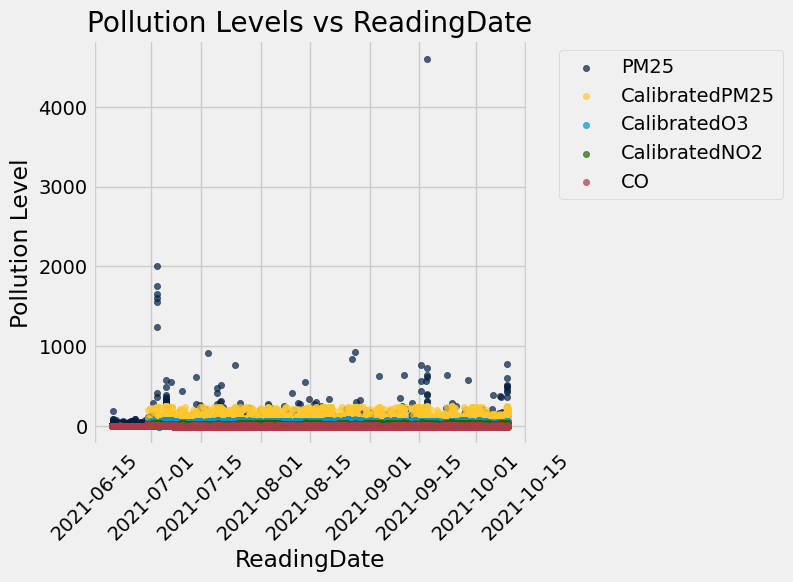

In [10]:
Chicago_ds_all.select("ReadingDate", "PM25", "CalibratedPM25", "CalibratedO3", "CalibratedNO2", "CO").scatter('ReadingDate')
plt.xticks(rotation=45)
plt.ylabel('Pollution Level')
plt.title('Pollution Levels vs ReadingDate')

Text(0.5, 1.0, 'Calibrated Pollution Levels vs ReadingDate')

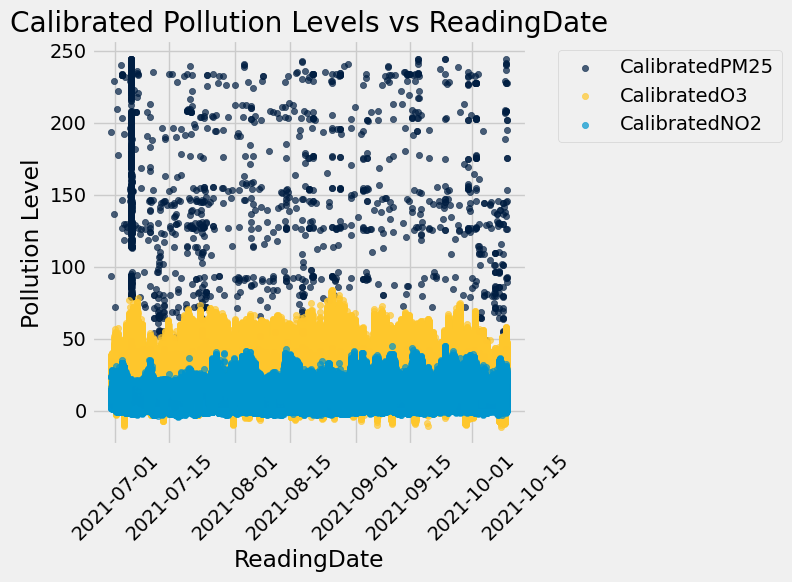

In [11]:
Chicago_ds_all.select("ReadingDate", "CalibratedPM25", "CalibratedO3", "CalibratedNO2").scatter('ReadingDate')
plt.xticks(rotation=45)
plt.ylabel('Pollution Level')
plt.title('Calibrated Pollution Levels vs ReadingDate')

In [12]:
def check_missing_values(ds_table):
  for label in ds_table.labels:
      column = ds_table.column(label)

      if np.issubdtype(type(column[0]), np.number):  # check numeric columns
          missing = np.count_nonzero(np.isnan(column))
      else:
          missing = np.count_nonzero(column == '')

      print(f"Missing values in '{label}': {missing}")
  print("num rows: ", ds_table.num_rows)

In [13]:
check_missing_values(Chicago_ds_all)

Missing values in 'City': 0
Missing values in 'DeviceId': 0
Missing values in 'LocationName': 0
Missing values in 'Latitude': 0
Missing values in 'Longitude': 0
Missing values in 'ReadingDateTimeUTC': 0
Missing values in 'PM25': 0
Missing values in 'CalibratedPM25': 34277
Missing values in 'CalibratedO3': 34277
Missing values in 'CalibratedNO2': 34277
Missing values in 'CO': 127
Missing values in 'Temperature': 0
Missing values in 'Humidity': 0
Missing values in 'BatteryLevel': 0
Missing values in 'PercentBattery': 0
Missing values in 'CellSignal': 0
Missing values in 'ReadingDate': 0
num rows:  2461089


In [14]:
Chicago_ds_cleaned = Chicago_ds_all.where(~np.isnan(Chicago_ds_all.column("CalibratedPM25")))
check_missing_values(Chicago_ds_cleaned)

Missing values in 'City': 0
Missing values in 'DeviceId': 0
Missing values in 'LocationName': 0
Missing values in 'Latitude': 0
Missing values in 'Longitude': 0
Missing values in 'ReadingDateTimeUTC': 0
Missing values in 'PM25': 0
Missing values in 'CalibratedPM25': 0
Missing values in 'CalibratedO3': 0
Missing values in 'CalibratedNO2': 0
Missing values in 'CO': 127
Missing values in 'Temperature': 0
Missing values in 'Humidity': 0
Missing values in 'BatteryLevel': 0
Missing values in 'PercentBattery': 0
Missing values in 'CellSignal': 0
Missing values in 'ReadingDate': 0
num rows:  2426812


In [15]:
Chicago_df_cleaned = Chicago_ds_cleaned.to_df()

In [16]:
def plot_pollution_vs(df_table, AnalyzingColumn):
  fig, axes = plt.subplots(1, 3, figsize=(18,5))
  df_table.plot.scatter(x = AnalyzingColumn, y = "CalibratedPM25", ax=axes[0], color="#001E42", title="CalibratedPM25 vs " + AnalyzingColumn)
  df_table.plot.scatter(x = AnalyzingColumn, y = "CalibratedO3", ax=axes[1], color="#FEC72C", title="CalibratedO3 vs " + AnalyzingColumn)
  df_table.plot.scatter(x = AnalyzingColumn, y = "CalibratedNO2", ax=axes[2], color="#0095CD", title="CalibratedNO2 vs " + AnalyzingColumn)

  for ax in axes:
    for label in ax.get_xticklabels():
      label.set_rotation(45)

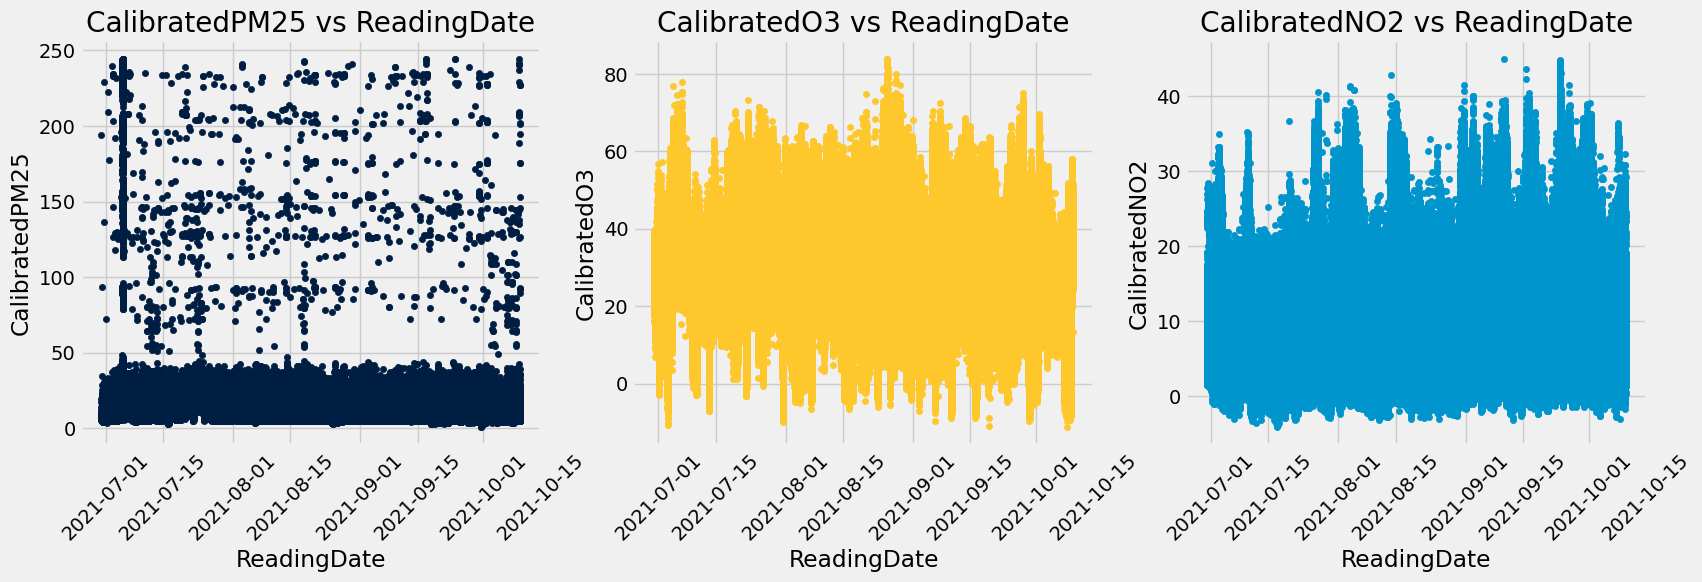

In [17]:
plot_pollution_vs(Chicago_df_cleaned, "ReadingDate")

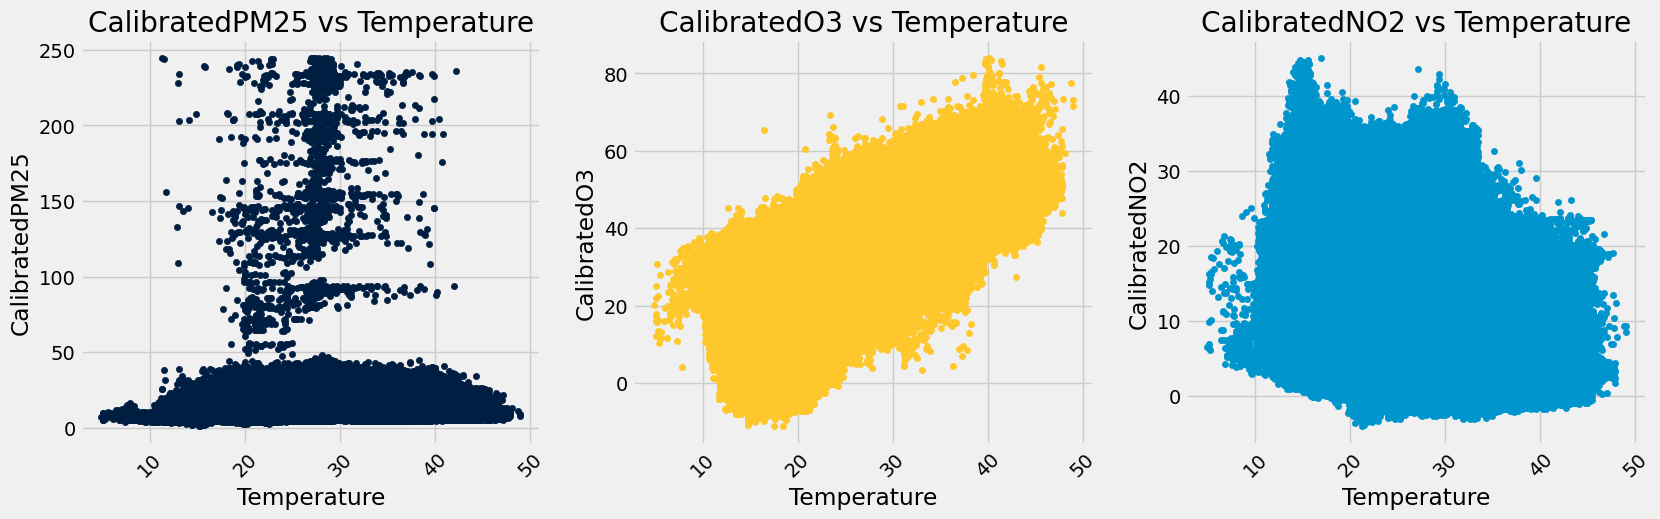

In [18]:
plot_pollution_vs(Chicago_df_cleaned, "Temperature")

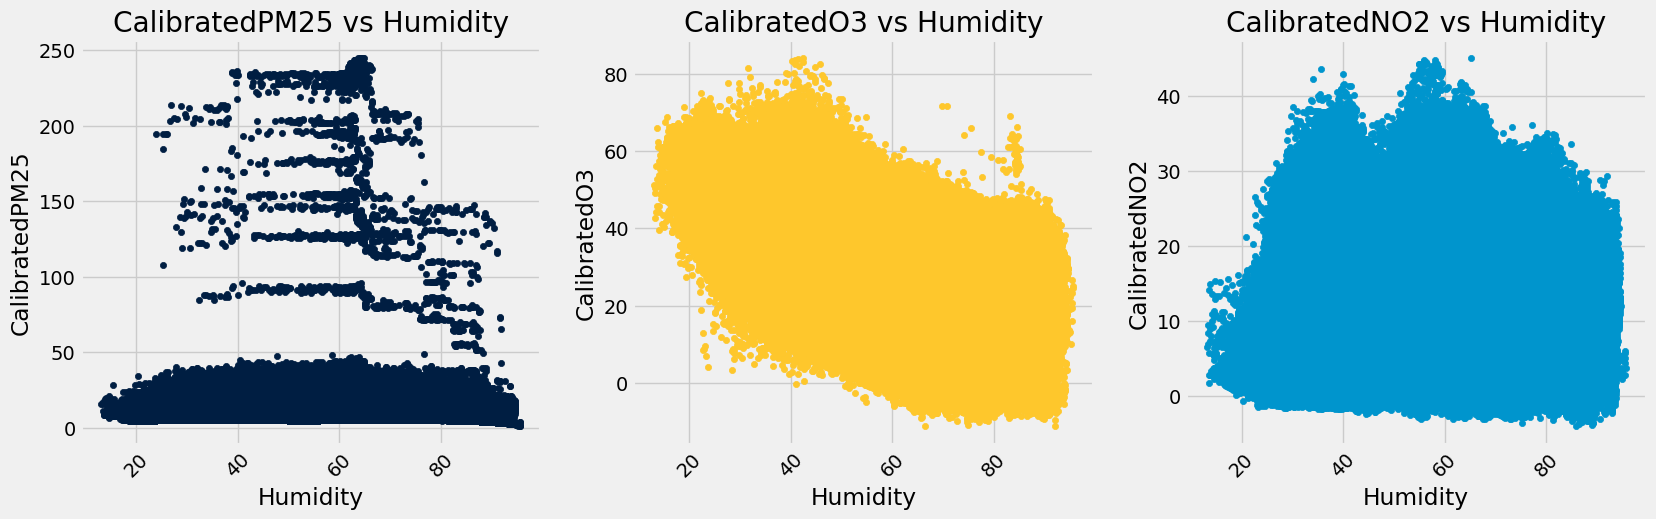

In [19]:
plot_pollution_vs(Chicago_df_cleaned, "Humidity")

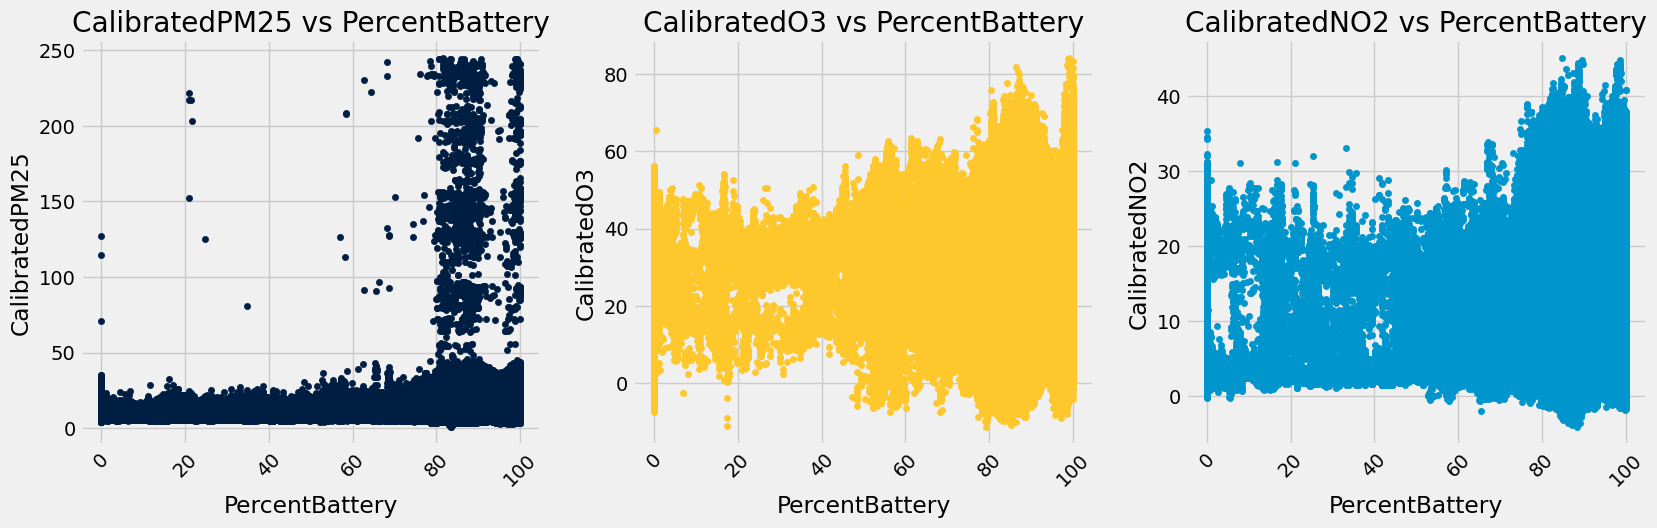

In [20]:
plot_pollution_vs(Chicago_df_cleaned, "PercentBattery")

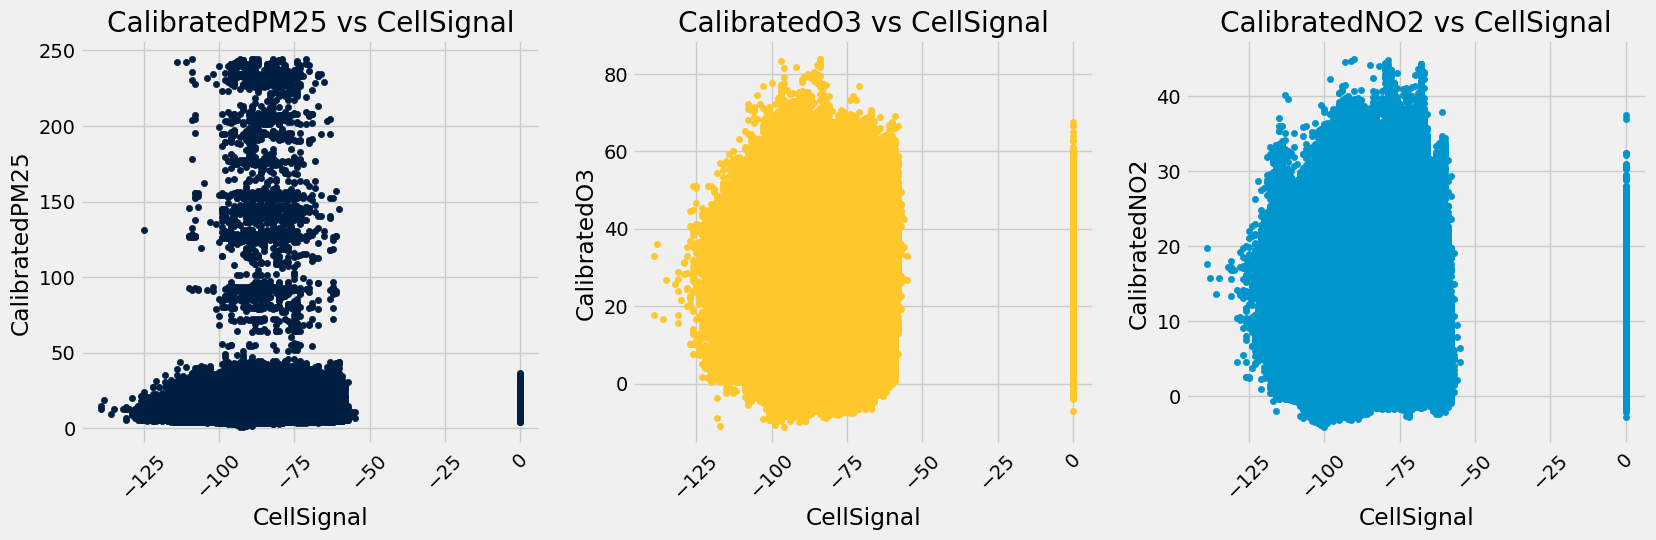

In [21]:
plot_pollution_vs(Chicago_df_cleaned, "CellSignal")

In [22]:
Chicago_df = Chicago_df_cleaned[["City",	"DeviceId",	"LocationName",	"Latitude",	"Longitude",	"ReadingDate", "CalibratedPM25",	"CalibratedO3",	"CalibratedNO2"]]
Chicago_df

,City,DeviceId,LocationName,Latitude,Longitude,ReadingDate,CalibratedPM25,CalibratedO3,CalibratedNO2
0,Chicago,2002,State & Garfield (SB),41.794921,-87.625857,2021-06-30 00:01:33,7.01,25.86,2.83
1,Chicago,2002,State & Garfield (SB),41.794921,-87.625857,2021-06-30 00:06:43,7.35,25.62,3.29
2,Chicago,2002,State & Garfield (SB),41.794921,-87.625857,2021-06-30 00:11:53,9.26,26.26,3.51
3,Chicago,2002,State & Garfield (SB),41.794921,-87.625857,2021-06-30 00:17:03,8.46,25.32,7.05
4,Chicago,2002,State & Garfield (SB),41.794921,-87.625857,2021-06-30 00:22:13,9.91,24.79,6.69
...,...,...,...,...,...,...,...,...,...
2426807,Chicago,2129,Lincoln & California (NWB),41.985920,-87.699628,2021-10-03 23:29:48,10.72,34.66,12.51
2426808,Chicago,2129,Lincoln & California (NWB),41.985920,-87.699628,2021-10-03 23:34:58,14.89,34.71,6.35
2426809,Chicago,2129,Lincoln & California (NWB),41.985920,-87.699628,2021-10-03 23:40:08,13.51,36.71,2.62
2426810,Chicago,2129,Lincoln & California (NWB),41.985920,-87.699628,2021-10-03 23:45:17,11.20,34.33,3.53


In [23]:
#Add Geohash grouping based on the latitude and longtiude columns
Chicago_df["GeoHashCode"] = Chicago_df.apply(lambda x: gh.encode(x.Latitude, x.Longitude, precision= Geohash_percision), axis=1)
Chicago_df

<ipython-input-23-5cbf98da220d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Chicago_df["GeoHashCode"] = Chicago_df.apply(lambda x: gh.encode(x.Latitude, x.Longitude, precision= Geohash_percision), axis=1)


,City,DeviceId,LocationName,Latitude,Longitude,ReadingDate,CalibratedPM25,CalibratedO3,CalibratedNO2,GeoHashCode
0,Chicago,2002,State & Garfield (SB),41.794921,-87.625857,2021-06-30 00:01:33,7.01,25.86,2.83,dp3ty0
1,Chicago,2002,State & Garfield (SB),41.794921,-87.625857,2021-06-30 00:06:43,7.35,25.62,3.29,dp3ty0
2,Chicago,2002,State & Garfield (SB),41.794921,-87.625857,2021-06-30 00:11:53,9.26,26.26,3.51,dp3ty0
3,Chicago,2002,State & Garfield (SB),41.794921,-87.625857,2021-06-30 00:17:03,8.46,25.32,7.05,dp3ty0
4,Chicago,2002,State & Garfield (SB),41.794921,-87.625857,2021-06-30 00:22:13,9.91,24.79,6.69,dp3ty0
...,...,...,...,...,...,...,...,...,...,...
2426807,Chicago,2129,Lincoln & California (NWB),41.985920,-87.699628,2021-10-03 23:29:48,10.72,34.66,12.51,dp3wu7
2426808,Chicago,2129,Lincoln & California (NWB),41.985920,-87.699628,2021-10-03 23:34:58,14.89,34.71,6.35,dp3wu7
2426809,Chicago,2129,Lincoln & California (NWB),41.985920,-87.699628,2021-10-03 23:40:08,13.51,36.71,2.62,dp3wu7
2426810,Chicago,2129,Lincoln & California (NWB),41.985920,-87.699628,2021-10-03 23:45:17,11.20,34.33,3.53,dp3wu7


In [24]:
# Min-Max Normalization
pollution_columns = ['CalibratedPM25', 'CalibratedO3', 'CalibratedNO2']
for col in pollution_columns:
   Chicago_df.loc[:, f'Normalized{col}'] = (Chicago_df[col] - Chicago_df[col].min()) / (Chicago_df[col].max() - Chicago_df[col].min())
# Combine normalized values into a pollution index
Chicago_df.loc[:, 'TotalNormalizedPollution'] = Chicago_df[[f'Normalized{col}' for col in pollution_columns]].sum(axis=1)
Chicago_df

<ipython-input-24-31759195c1e5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Chicago_df.loc[:, f'Normalized{col}'] = (Chicago_df[col] - Chicago_df[col].min()) / (Chicago_df[col].max() - Chicago_df[col].min())
<ipython-input-24-31759195c1e5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Chicago_df.loc[:, f'Normalized{col}'] = (Chicago_df[col] - Chicago_df[col].min()) / (Chicago_df[col].max() - Chicago_df[col].min())
<ipython-input-24-31759195c1e5>:4: SettingWithCopyWarning: 
A value is trying to be se

,City,DeviceId,LocationName,Latitude,Longitude,ReadingDate,CalibratedPM25,CalibratedO3,CalibratedNO2,GeoHashCode,NormalizedCalibratedPM25,NormalizedCalibratedO3,NormalizedCalibratedNO2,TotalNormalizedPollution
0,Chicago,2002,State & Garfield (SB),41.794921,-87.625857,2021-06-30 00:01:33,7.01,25.86,2.83,dp3ty0,0.024473,0.389152,0.140151,0.553776
1,Chicago,2002,State & Garfield (SB),41.794921,-87.625857,2021-06-30 00:06:43,7.35,25.62,3.29,dp3ty0,0.025870,0.386629,0.149521,0.562020
2,Chicago,2002,State & Garfield (SB),41.794921,-87.625857,2021-06-30 00:11:53,9.26,26.26,3.51,dp3ty0,0.033712,0.393356,0.154003,0.581072
3,Chicago,2002,State & Garfield (SB),41.794921,-87.625857,2021-06-30 00:17:03,8.46,25.32,7.05,dp3ty0,0.030427,0.383475,0.226115,0.640018
4,Chicago,2002,State & Garfield (SB),41.794921,-87.625857,2021-06-30 00:22:13,9.91,24.79,6.69,dp3ty0,0.036382,0.377904,0.218782,0.633067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426807,Chicago,2129,Lincoln & California (NWB),41.985920,-87.699628,2021-10-03 23:29:48,10.72,34.66,12.51,dp3wu7,0.039708,0.481657,0.337340,0.858704
2426808,Chicago,2129,Lincoln & California (NWB),41.985920,-87.699628,2021-10-03 23:34:58,14.89,34.71,6.35,dp3wu7,0.056831,0.482182,0.211856,0.750869
2426809,Chicago,2129,Lincoln & California (NWB),41.985920,-87.699628,2021-10-03 23:40:08,13.51,36.71,2.62,dp3wu7,0.051164,0.503206,0.135873,0.690243
2426810,Chicago,2129,Lincoln & California (NWB),41.985920,-87.699628,2021-10-03 23:45:17,11.20,34.33,3.53,dp3wu7,0.041679,0.478188,0.154410,0.674277


## **Defining Functions & Grouping the Data**

In [25]:
def group_and_average(df_table, group_column):
   result_rows = []
   unique_values = df_table[group_column].dropna().unique()
   for val in unique_values:
       group_df_table = df_table[df_table[group_column] == val]
       avg_values = group_df_table.mean(numeric_only=True)
       avg_values[group_column] = val
       avg_values['TotalRecords'] = len(group_df_table)
       avg_values['TotalSensors'] = group_df_table['DeviceId'].nunique()
       result_rows.append(avg_values)
   result_df_table = pd.DataFrame(result_rows)
   cols = [group_column, 'TotalRecords', 'TotalSensors'] + [col for col in result_df_table.columns if col not in [group_column, 'TotalRecords', 'TotalSensors']]
   return result_df_table[cols]

In [26]:
def stratified_sample(df_table, group_column='DeviceId', frac=0.2, random_state=None):
   """
   Returns a stratified sample of the input dataframe, preserving the proportion of each sensor's readings.
   Parameters:
       df_table (DataFrame): Input data with a column identifying sensor ID.
       sensor_column (str): Name of the column containing sensor IDs.
       frac (float): Fraction of rows to sample per group (default = 0.2 for 20%).
       random_state (int): Seed for reproducibility (optional).
   Returns:
       DataFrame: Stratified sampled data.
   """
   sampled_df = (
       df_table
       .groupby(group_column, group_keys=False)
       .apply(lambda x: x.sample(frac=frac, replace=False, random_state=random_state))
       .reset_index(drop=True)
   )
   return sampled_df

In [ ]:
def cluster_nearby_geohash_points(df_table, pollution_column):
    # Step 1: Filter only valid rows
    subset = df_table.dropna(subset=['Latitude', 'Longitude', pollution_column]).copy()

    # Step 2: Extract and scale features
    features = subset[['Latitude', 'Longitude', pollution_column]].values
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    # Step 3: Apply DBSCAN
    db = DBSCAN(eps=0.3, min_samples=1)
    labels = db.fit_predict(scaled_features)
    subset['Cluster'] = labels

    # Step 4: Remove noise
    clustered = subset[subset['Cluster'] != -1]

    # Step 5: Compute centroids and average pollution
    centroids = (
        clustered
        .groupby('Cluster')[['Latitude', 'Longitude', pollution_column]]
        .mean()
        .reset_index()
        .rename(columns={pollution_column: f'Avg_{pollution_column}'})
    )

    # Step 6: Plot
    plt.figure(figsize=(10, 8))
    plt.scatter(
        clustered['Longitude'], clustered['Latitude'],
        c='skyblue', s=50, alpha=0.6, label='Sensor Points'
    )

    # Color-coded centroids
    pollution_levels = centroids[f'Avg_{pollution_column}']
    norm = plt.Normalize(pollution_levels.min(), pollution_levels.max())
    cmap = plt.colormaps['YlOrRd']

    scatter = plt.scatter(
        centroids['Longitude'],
        centroids['Latitude'],
        c=pollution_levels,
        cmap=cmap,
        norm=norm,
        s=100,
        marker='X',
        edgecolor='black',
        label='Cluster Centroids (pollution)'
    )

    plt.title("Nearby Clustered Sensor Points", fontsize=14)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # attach colorbar to the scatter plot
    cbar = plt.colorbar(scatter)
    cbar.set_label(f'Avg {pollution_column}')

    plt.show()

    return clustered, centroids

In [43]:
def cluster_nearby_geohash_points(df_table, pollution_column, ax=None):
   # Step 1: Filter only valid rows
   subset = df_table.dropna(subset=['Latitude', 'Longitude', pollution_column]).copy()
   # Step 2: Extract and scale features
   features = subset[['Latitude', 'Longitude', pollution_column]].values
   scaler = StandardScaler()
   scaled_features = scaler.fit_transform(features)
   # Step 3: Apply DBSCAN
   db = DBSCAN(eps=0.3, min_samples=1)
   subset['Cluster'] = db.fit_predict(scaled_features)
   # Step 4: Remove noise
   clustered = subset[subset['Cluster'] != -1]
   # Step 5: Compute centroids and average pollution
   centroids = (
       clustered
       .groupby('Cluster')[['Latitude', 'Longitude', pollution_column]]
       .mean()
       .reset_index()
       #.rename(columns={pollution_column: f'Avg_{pollution_column}'})
   )
   # Step 6: Plot
   if ax is None:
       fig, ax = plt.subplots(figsize=(10, 8))
   ax.scatter(clustered['Longitude'], clustered['Latitude'], c='skyblue', s=50, alpha=0.6, label='Sensor Points')
   #ax.scatter(centroids['Longitude'], centroids['Latitude'], c='red', s=30, marker='X', label='Cluster Centroids')
   # Color-coded centroids
   pollution_levels = centroids[pollution_column]
   norm = colors.Normalize(pollution_levels.min(), pollution_levels.max())
   cmap = plt.get_cmap('YlOrRd')

   scatter = ax.scatter(
      centroids['Longitude'],
      centroids['Latitude'],
      c=pollution_levels,
      cmap=cmap,
      norm=norm,
      s=100,
      marker='X',
      edgecolor='black',
      label='Cluster Centroids'
  )
   ax.set_title("Nearby Clustered Sensor Points", fontsize=14)
   ax.set_xlabel("Longitude")
   ax.set_ylabel("Latitude")
   ax.legend()
   ax.grid(True)
   # attach colorbar to the scatter plot
   cbar = ax.figure.colorbar(scatter)
   cbar.set_label(f'Avg {pollution_column}')
   return clustered, centroids

In [29]:
def mst_with_pollution(df_table, pollution_column, ax=None):
   start_time = time.time()
   # Filter for valid rows (with pollution and location)
   df_subset = df_table.dropna(subset=['Latitude', 'Longitude', pollution_column]).copy()
   # Step 1: Normalize the pollution column (0–1)
   pollution_vals = df_subset[pollution_column].values
   pollution_norm = pollution_vals #(pollution_vals - pollution_vals.min()) / (pollution_vals.max() - pollution_vals.min())
   # Step 2: Compute the spatial distance matrix
   coords = df_subset[['Latitude', 'Longitude']].values
   spatial_dist = distance_matrix(coords, coords)
   # Step 3: Compute pollution influence (average pollution between point pairs)
   pollution_matrix = np.add.outer(pollution_norm, pollution_norm) / 2
   # Step 4: Combine into a weighted matrix: Distance × (1 + pollution influence)
   weighted_dist_matrix = spatial_dist * (1 + pollution_matrix)
   # Step 5: Compute MST
   mst = minimum_spanning_tree(weighted_dist_matrix).toarray()
   # Step 6: Compute total path length
   total_weight = mst[mst > 0].sum()
   elapsed_time = time.time() - start_time
   # Step 7: Plot
   if ax is None:
       fig, ax = plt.subplots(figsize=(10, 8))
   ax.scatter(df_subset['Longitude'], df_subset['Latitude'], s=8, color='blue', alpha=0.7)
   for i in range(len(mst)):
       for j in range(len(mst)):
           if mst[i][j] > 0:
               plt.plot(
                   [df_subset.iloc[i]['Longitude'], df_subset.iloc[j]['Longitude']],
                   [df_subset.iloc[i]['Latitude'], df_subset.iloc[j]['Latitude']],
                   'k-', linewidth=0.5
               )
   plt.title(f"MST Weighted by Distance and {pollution_column} | Total Path Length: {total_weight:.2f} km.", fontsize=12)
   plt.xlabel("Longitude")
   plt.ylabel("Latitude")
   plt.grid(True)
   plt.tight_layout()
   plt.show()
   return total_weight, mst

In [30]:
def plot_comparison(df_table, pollution_column, show_cluster=True, show_mst=True):
   import matplotlib.pyplot as plt
   plots = sum([show_cluster, show_mst])
   fig, axes = plt.subplots(1, plots, figsize=(12 * plots, 8))
   if plots == 1:
       axes = [axes]  # ensure iterable
   idx = 0
   if show_cluster:
       cluster_nearby_geohash_points(df_table, pollution_column, ax=axes[idx])
       idx += 1
   if show_mst:
       mst_with_pollution(df_table, pollution_column, ax=axes[idx])
   plt.tight_layout()
   plt.show()

In [31]:
Pollution_By_Sensor = group_and_average(Chicago_df, "DeviceId")
Pollution_By_Sensor

,DeviceId,TotalRecords,TotalSensors,Latitude,Longitude,CalibratedPM25,CalibratedO3,CalibratedNO2,NormalizedCalibratedPM25,NormalizedCalibratedO3,NormalizedCalibratedNO2,TotalNormalizedPollution
0,2002.0,28027.0,1.0,41.794921,-87.625857,12.734706,30.507605,10.319326,0.047981,0.438007,0.292714,0.778701
1,2003.0,28142.0,1.0,41.795500,-87.625500,11.718640,30.904625,8.139903,0.043808,0.442180,0.248317,0.734306
2,2004.0,28368.0,1.0,41.845100,-87.695204,13.048965,32.377175,9.906979,0.049271,0.457660,0.284314,0.791245
3,2005.0,28302.0,1.0,41.852400,-87.695200,13.608612,30.283518,9.652375,0.051569,0.435651,0.279128,0.766348
4,2006.0,28306.0,1.0,41.852300,-87.695400,13.601985,32.949301,10.974670,0.051542,0.463674,0.306064,0.821280
...,...,...,...,...,...,...,...,...,...,...,...,...
116,2037.0,9.0,1.0,41.823716,-87.646346,16.417778,33.063333,26.370000,0.063104,0.464873,0.619678,1.147655
117,2033.0,13.0,1.0,41.759507,-87.644385,13.286923,33.016923,19.513846,0.050248,0.464385,0.480013,0.994646
118,2040.0,5.0,1.0,41.881471,-87.672189,15.394000,28.116000,24.962000,0.058900,0.412867,0.590996,1.062763
119,2042.0,8.0,1.0,41.844200,-87.724800,14.596250,32.378750,19.647500,0.055625,0.457676,0.482736,0.996037


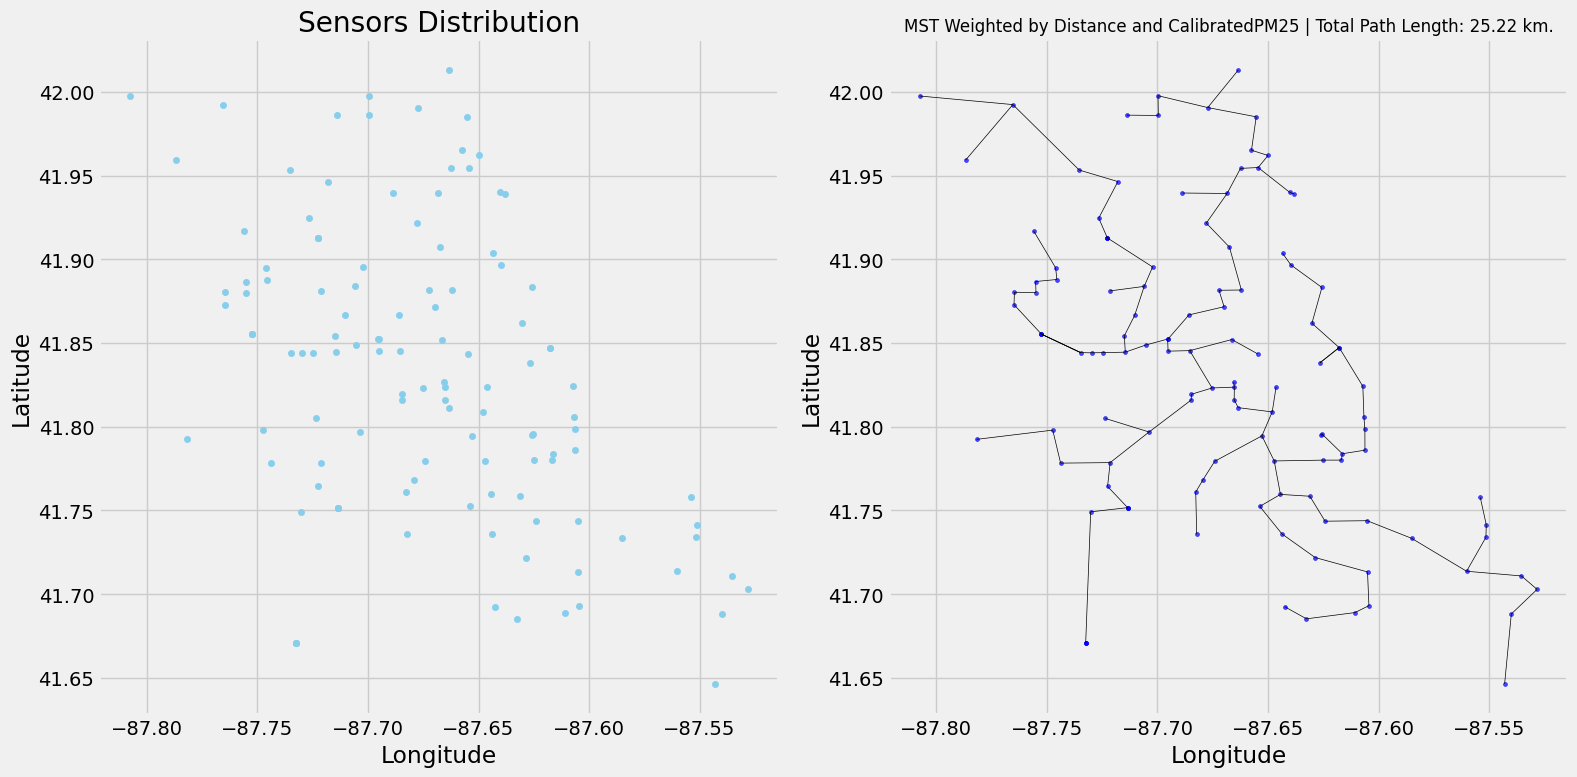

<Figure size 640x480 with 0 Axes>

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
Pollution_By_Sensor.plot.scatter(x = "Longitude", y = "Latitude", ax=ax[0], c='skyblue', title="Sensors Distribution")
mst_with_pollution(Pollution_By_Sensor, 'CalibratedPM25', ax=ax[1])
plt.tight_layout()
plt.show()

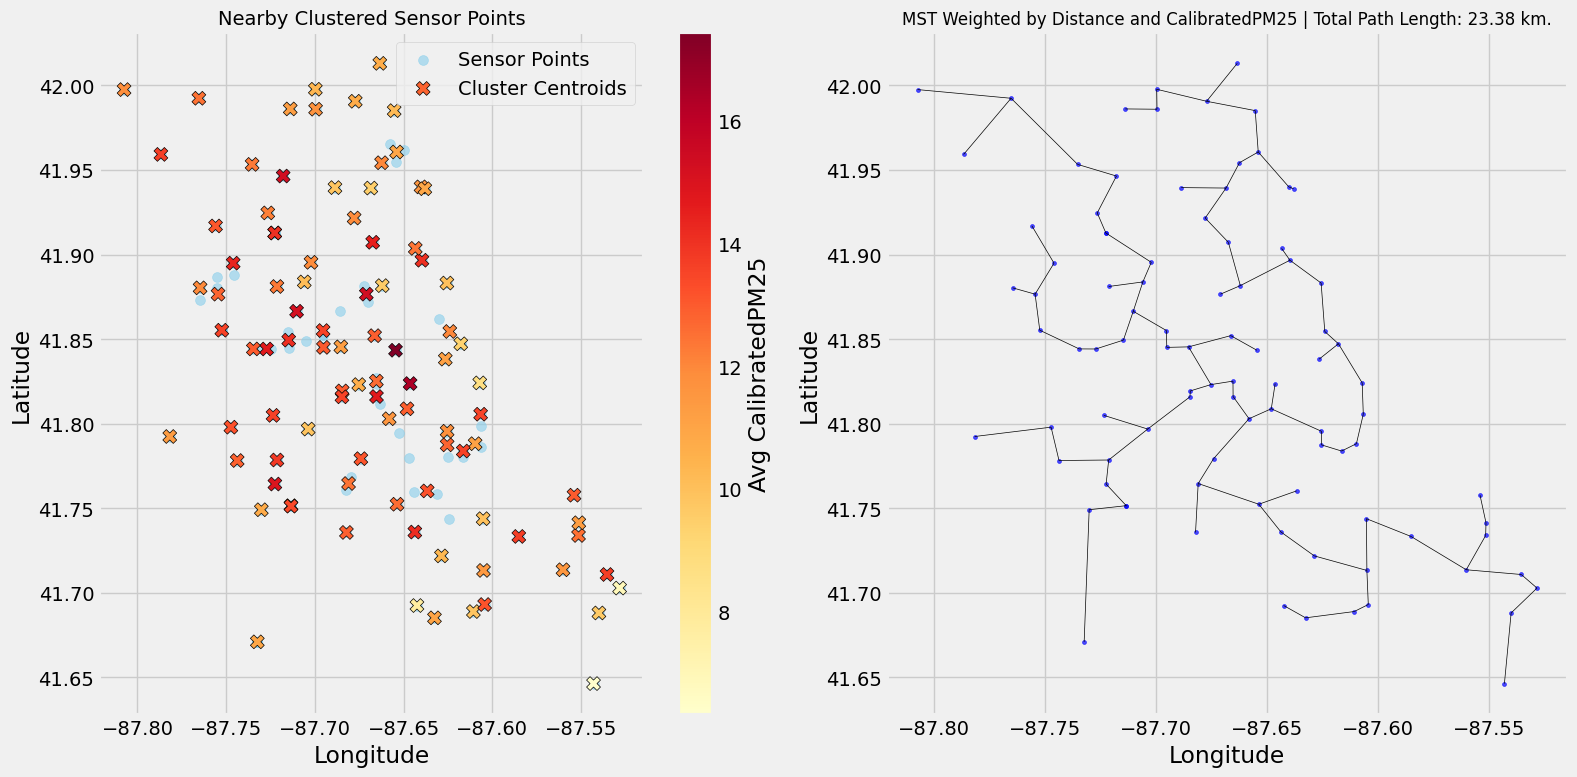

<Figure size 640x480 with 0 Axes>

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
clustered_sensors, centroids_sensors = cluster_nearby_geohash_points(Pollution_By_Sensor, 'CalibratedPM25', ax=ax[0])
mst_with_pollution(centroids_sensors, 'CalibratedPM25', ax=ax[1])
plt.tight_layout()
plt.show()

In [45]:
Pollution_By_Geohash = group_and_average(Chicago_df, "GeoHashCode")
Pollution_By_Geohash

,GeoHashCode,TotalRecords,TotalSensors,DeviceId,Latitude,Longitude,CalibratedPM25,CalibratedO3,CalibratedNO2,NormalizedCalibratedPM25,NormalizedCalibratedO3,NormalizedCalibratedNO2,TotalNormalizedPollution
0,dp3ty0,56169,2,2002.501024,41.795211,-87.625678,12.225633,30.706521,9.227383,0.045890,0.440098,0.270470,0.756458
1,dp3wh3,28368,1,2004.000000,41.845100,-87.695204,13.048965,32.377175,9.906979,0.049271,0.457660,0.284314,0.791245
2,dp3wh6,56608,2,2005.500035,41.852350,-87.695300,13.605298,31.616503,10.313569,0.051555,0.449664,0.292597,0.793816
3,dp3ts0,56511,3,2012.944506,41.751499,-87.713489,11.057970,33.037811,6.500428,0.041095,0.464604,0.214920,0.720620
4,dp3w7v,56735,3,2009.752587,41.912740,-87.722674,10.927356,34.219436,6.198642,0.040559,0.477026,0.208773,0.726357
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,dp3tvt,9,1,2037.000000,41.823716,-87.646346,16.417778,33.063333,26.370000,0.063104,0.464873,0.619678,1.147655
102,dp3ttd,13,1,2033.000000,41.759507,-87.644385,13.286923,33.016923,19.513846,0.050248,0.464385,0.480013,0.994646
103,dp3wkb,5,1,2040.000000,41.881471,-87.672189,15.394000,28.116000,24.962000,0.058900,0.412867,0.590996,1.062763
104,dp3w5c,8,1,2042.000000,41.844200,-87.724800,14.596250,32.378750,19.647500,0.055625,0.457676,0.482736,0.996037


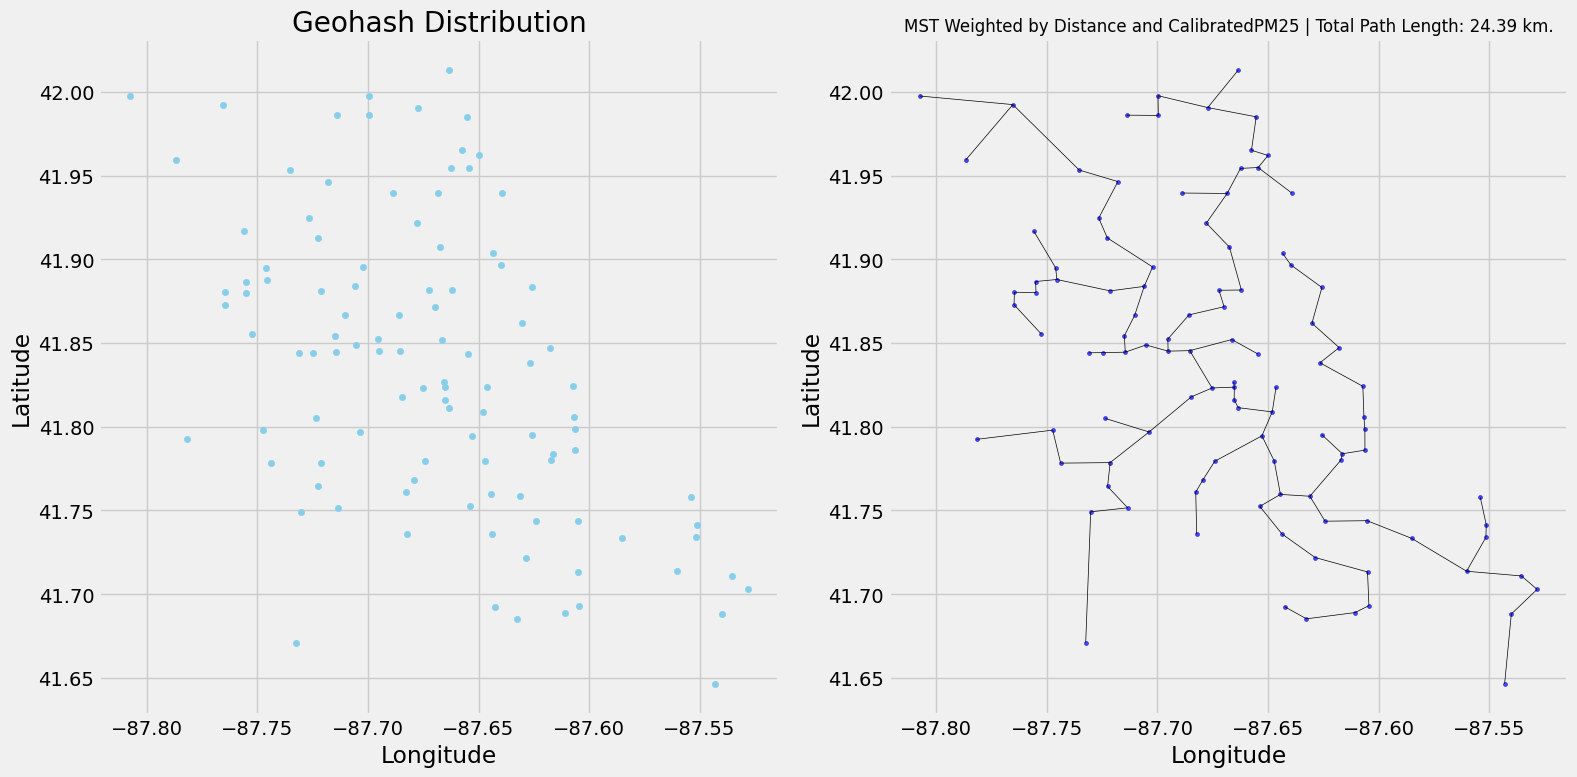

<Figure size 640x480 with 0 Axes>

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
Pollution_By_Geohash.plot.scatter(x = "Longitude", y = "Latitude", ax=ax[0], c='skyblue', title="Geohash Distribution")
mst_with_pollution(Pollution_By_Geohash, 'CalibratedPM25', ax=ax[1])
plt.tight_layout()
plt.show()

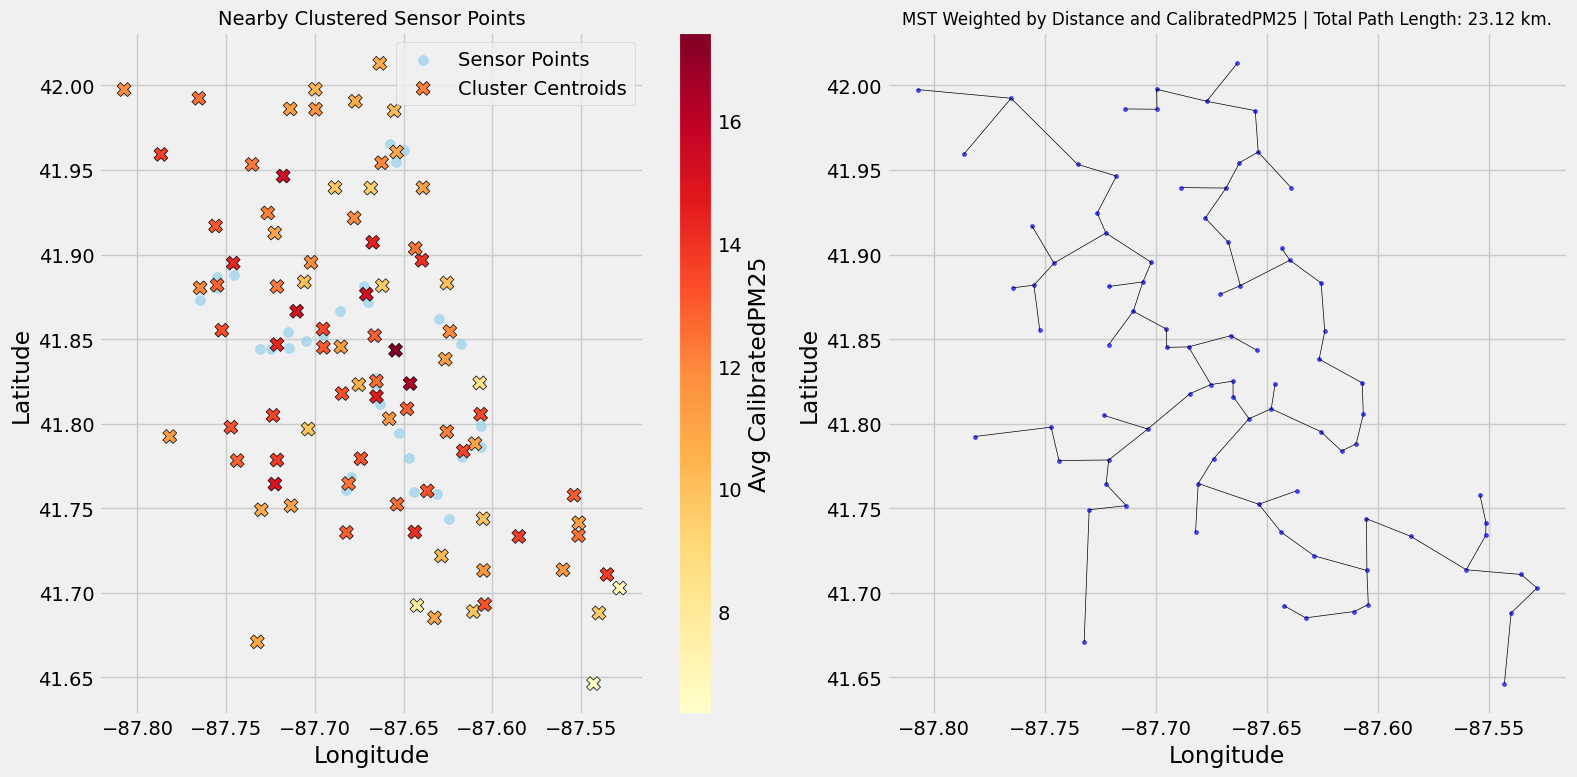

<Figure size 640x480 with 0 Axes>

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
clustered_geohash, centroids_geohash = cluster_nearby_geohash_points(Pollution_By_Geohash, 'CalibratedPM25', ax=ax[0])
mst_with_pollution(centroids_geohash, 'CalibratedPM25', ax=ax[1])
plt.tight_layout()
plt.show()

In [49]:
Sample_Data = stratified_sample(Chicago_df, "DeviceId", 0.1)
Sample_Data

<ipython-input-26-dd9275cf6688>:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(frac=frac, replace=False, random_state=random_state))


,City,DeviceId,LocationName,Latitude,Longitude,ReadingDate,CalibratedPM25,CalibratedO3,CalibratedNO2,GeoHashCode,NormalizedCalibratedPM25,NormalizedCalibratedO3,NormalizedCalibratedNO2,TotalNormalizedPollution
0,Chicago,2002,State & Garfield (SB),41.794921,-87.625857,2021-08-27 18:27:48,11.39,55.78,0.61,dp3ty0,0.042459,0.703669,0.094928,0.841055
1,Chicago,2002,State & Garfield (SB),41.794921,-87.625857,2021-07-14 04:42:29,11.10,19.86,11.52,dp3ty0,0.041268,0.326080,0.317173,0.684521
2,Chicago,2002,State & Garfield (SB),41.794921,-87.625857,2021-08-16 09:16:10,8.97,7.15,24.42,dp3ty0,0.032522,0.192473,0.579955,0.804950
3,Chicago,2002,State & Garfield (SB),41.794921,-87.625857,2021-07-19 10:31:24,11.40,27.74,13.30,dp3ty0,0.042500,0.408914,0.353432,0.804846
4,Chicago,2002,State & Garfield (SB),41.794921,-87.625857,2021-08-17 12:24:34,12.35,8.13,19.80,dp3ty0,0.046401,0.202775,0.485842,0.735018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242674,Chicago,2214,EPA COM ED Maintenance Bldg F,41.751200,-87.713490,2021-08-21 18:47:04,13.05,15.08,19.38,dp3ts0,0.049275,0.275833,0.477287,0.802395
242675,Chicago,2214,EPA COM ED Maintenance Bldg F,41.751200,-87.713490,2021-08-21 15:04:38,14.47,12.55,16.47,dp3ts0,0.055106,0.249238,0.418008,0.722352
242676,Chicago,2214,EPA COM ED Maintenance Bldg F,41.751200,-87.713490,2021-08-21 14:03:51,13.04,16.43,18.00,dp3ts0,0.049234,0.290024,0.449175,0.788433
242677,Chicago,2214,EPA COM ED Maintenance Bldg F,41.751200,-87.713490,2021-08-22 04:34:43,12.84,19.59,16.53,dp3ts0,0.048413,0.323242,0.419230,0.790885


In [50]:
Sample_Data_By_Geohash = group_and_average(Sample_Data, "GeoHashCode")
Sample_Data_By_Geohash

,GeoHashCode,TotalRecords,TotalSensors,DeviceId,Latitude,Longitude,CalibratedPM25,CalibratedO3,CalibratedNO2,NormalizedCalibratedPM25,NormalizedCalibratedO3,NormalizedCalibratedNO2,TotalNormalizedPollution
0,dp3ty0,5617,2,2002.500979,41.795211,-87.625678,12.124485,30.645857,9.125540,0.045475,0.439460,0.268396,0.753331
1,dp3wh3,2837,1,2004.000000,41.845100,-87.695204,13.158090,32.395280,9.923705,0.049719,0.457850,0.284655,0.792224
2,dp3wh6,5661,2,2005.500088,41.852350,-87.695300,13.545276,31.718751,10.456619,0.051309,0.450738,0.295511,0.797558
3,dp3ts0,5651,3,2012.944435,41.751499,-87.713489,11.092132,33.026896,6.495127,0.041236,0.464490,0.214812,0.720537
4,dp3w7v,5673,3,2009.748986,41.912740,-87.722674,10.961634,34.411807,6.089457,0.040700,0.479048,0.206548,0.726296
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,dp3wsd,987,1,2191.000000,41.939568,-87.688703,9.705552,28.952199,11.187700,0.035542,0.421657,0.310403,0.767602
101,dp3tqv,11,1,2195.000000,41.733300,-87.585100,14.529091,21.183636,18.607273,0.055349,0.339994,0.461546,0.856888
102,dp3tqp,13,1,2207.000000,41.743500,-87.624200,13.169231,23.047692,13.070000,0.049765,0.359589,0.348747,0.758101
103,dp3tv5,239,1,2209.000000,41.811340,-87.663482,11.681213,14.145272,18.651255,0.043655,0.266007,0.462442,0.772103


<Axes: title={'center': 'Sensors Distribution'}, xlabel='Longitude', ylabel='Latitude'>

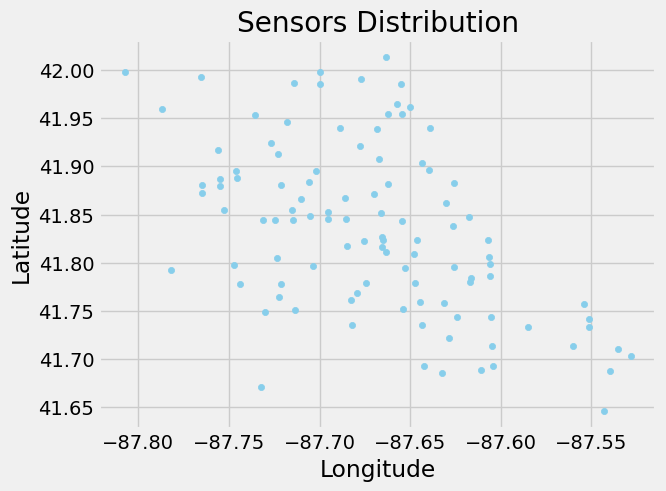

In [51]:
Sample_Data_By_Geohash.plot.scatter(x = "Longitude", y = "Latitude", c='skyblue', title="Sensors Distribution")

In [52]:
#fig, ax = plt.subplots(1, 2, figsize=(16, 8))
#Sample_Data_By_Geohash.plot.scatter(x = "Longitude", y = "Latitude", ax=ax[0], c='skyblue', title="Sensors Distribution")
#mst_with_pollution(Sample_Data, 'CalibratedPM25', ax=ax[1])
#plt.tight_layout()
#plt.show()

In [53]:
#fig, ax = plt.subplots(1, 2, figsize=(16, 8))
#clustered_sample, centroids_sample = cluster_nearby_geohash_points(Sample_Data, 'CalibratedPM25', ax=ax[0])
#mst_with_pollution(centroids_sample, 'CalibratedPM25', ax=ax[1])
#plt.tight_layout()
#plt.show()